In [ ]:
#colab cell
#from google.colab import drive
#drive.mount('/content/drive')
#!unzip /content/drive/MyDrive/Colab\ Notebooks/Phase1.zip
!ls

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.svm import SVC
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.optimizers import Adam

In [2]:
# Define the directory containing your images
data_dir = "C:\code\AI\DataSet1"
defect_images_dir = os.path.join(data_dir, "Defected")
ok_images_dir = os.path.join(data_dir, "OK")
target_size = 412

print(data_dir, defect_images_dir, ok_images_dir)
# Load images and labels
defect_images = []
ok_images = []
labels = []



C:\code\AI\DataSet1 C:\code\AI\DataSet1\Defected C:\code\AI\DataSet1\OK


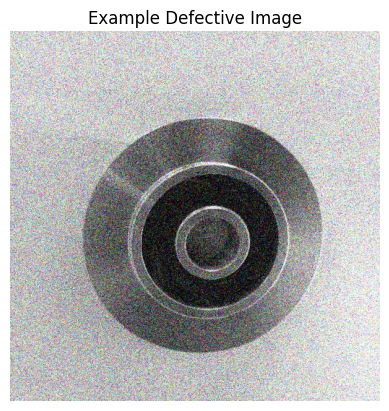

In [3]:
for img_name in os.listdir(defect_images_dir):
    img_path = os.path.join(defect_images_dir, img_name)
    img = load_img(img_path, target_size=(target_size, target_size))  # Assuming images are resized to 224x224
    defect_images.append(img_to_array(img))
    labels.append(1)  # Defective images have label 1
i = 0
for img_name in os.listdir(ok_images_dir):
    img_path = os.path.join(ok_images_dir, img_name)
    img = load_img(img_path, target_size=(target_size, target_size))  # Assuming images are resized to 224x224
    if i == 0:
        plt.imshow(img)
        plt.title("Example Defective Image")
        plt.axis('off')  # Turn off axis labels
        plt.show()
        i += 1
    ok_images.append(img_to_array(img))
    labels.append(0)  # Ok images have label 0

defect_images = np.array(defect_images)
ok_images = np.array(ok_images)
labels = np.array(labels)

In [4]:
# Combine defect and ok images
X = np.concatenate((defect_images, ok_images), axis=0)
y = labels
del defect_images
del ok_images
del labels

In [5]:
# Split the dataset into training and testing sets (90% training, 10% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Reshape images to 1D array (assuming grayscale images)
X_train_flattened = X_train.reshape(X_train.shape[0], -1)
X_test_flattened = X_test.reshape(X_test.shape[0], -1)

SVM

In [6]:
# Train SVM model
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train_flattened, y_train)

# Predict on the test set
y_pred = svm_model.predict(X_test_flattened)

CNN

In [ ]:
# Define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(target_size, target_size, 3)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Conv2D(256, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

In [ ]:
# Compile the model
optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Train the model
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_split=0.1)


In [ ]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", test_accuracy)

In [ ]:
# Predict on the test set
y_pred = model.predict(X_test)
y_pred_classes = np.round(y_pred)

SVM Result

In [7]:
# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, _ = roc_curve(y_test, y_pred)


In [8]:
# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)
print("ROC AUC Score:", roc_auc)


Accuracy: 0.744
Confusion Matrix:
 [[32 17]
 [15 61]]
Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.65      0.67        49
           1       0.78      0.80      0.79        76

    accuracy                           0.74       125
   macro avg       0.73      0.73      0.73       125
weighted avg       0.74      0.74      0.74       125

ROC AUC Score: 0.7278464017185823


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


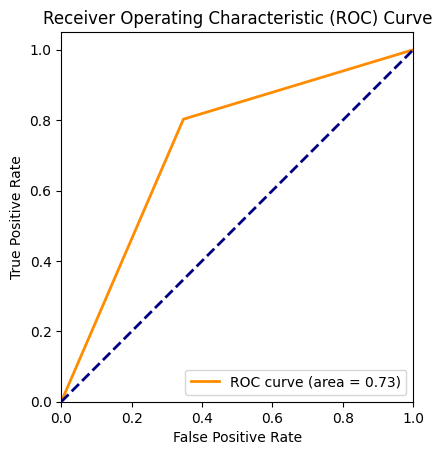

In [10]:
# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.imshow(ok_images[1])
plt.show()

CNN Result

In [ ]:
# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred_classes)
conf_matrix = confusion_matrix(y_test, y_pred_classes)
classification_rep = classification_report(y_test, y_pred_classes)
roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, _ = roc_curve(y_test, y_pred)

In [ ]:
# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)
print("ROC AUC Score:", roc_auc)


In [ ]:
# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()